In [3]:
import pandas as pd

# Замените 'path_to_your_csv_file.csv' на путь к вашему CSV-файлу
df = pd.read_csv('gene_presence_absence.csv')

# Выведите первые несколько строк, чтобы убедиться, что данные загрузились правильно
print(df.head())

        Gene Non-unique Gene name            Annotation        MGYG000304142  \
0  group_419                  NaN  hypothetical protein  MGYG000304142_00583   
1  group_418                  NaN  hypothetical protein  MGYG000304142_00581   
2  group_417                  NaN  hypothetical protein  MGYG000304142_00667   
3  group_416                  NaN  hypothetical protein  MGYG000304142_00653   
4  group_415                  NaN  hypothetical protein  MGYG000304142_00580   

         MGYG000303700  
0  MGYG000303700_00027  
1  MGYG000303700_00542  
2  MGYG000303700_00620  
3  MGYG000303700_00015  
4  MGYG000303700_00541  


In [4]:
from Bio import SeqIO

file_path = 'pan-genome.fna'

# создание объекта SeqRecord
records = SeqIO.parse(file_path, 'fasta')

# выведите первую последовательность
first_record = next(records)
print(f'Идентификатор: {first_record.id}')
print(f'Описание: {first_record.description}')
print(f'Длина: {len(first_record.seq)}')
print(f'Последовательность: {first_record.seq}')
protein_seq = first_record.seq.translate()
print(protein_seq)

Идентификатор: mraZ
Описание: mraZ
Длина: 366
Последовательность: ATGAGCAAAGTTGATTACTTCGAACGCAAGCTAGACGACAAACATCGTCTGACCATCCCAGTAGAATTACGGGGTGAATTTGCGAACGGTGTAGTCATCACCCGCGGCTTTGGTAAGTACTTGCATCTCTATGCGAAGGAGGTTTGGGATAATGAAATGGAATCTGCATTGCAGGGCAACATCTTGGATGAACACATCGCCGACCTAAACGTCAAGTTTCGGGCTGGCAAGTCAGAGGCTGAGATGGACGCCAAGCAGGGGCGGATTACCATTGAACAACACCTACTTGATTACGCCAAGATTGACCGCGACGTGGTCGCCATCCGAGCGGGCAAGTATTGGCGGTTGACTGCGCAAGCAGATTAA
MSKVDYFERKLDDKHRLTIPVELRGEFANGVVITRGFGKYLHLYAKEVWDNEMESALQGNILDEHIADLNVKFRAGKSEAEMDAKQGRITIEQHLLDYAKIDRDVVAIRAGKYWRLTAQAD*


In [5]:
amino_acid_dict = {
    "A": "Alanine",
    "C": "Cysteine",
    "D": "Aspartic Acid",
    "E": "Glutamic Acid",
    "F": "Phenylalanine",
    "G": "Glycine",
    "H": "Histidine",
    "I": "Isoleucine",
    "K": "Lysine",
    "L": "Leucine",
    "M": "Methionine",
    "N": "Asparagine",
    "P": "Proline",
    "Q": "Glutamine",
    "R": "Arginine",
    "S": "Serine",
    "T": "Threonine",
    "U": "Selenocysteine",
    "V": "Valine",
    "W": "Tryptophan",
    "Y": "Tyrosine",
    "*": "Stop Codon"
}


In [6]:
for amino_acid in protein_seq:
    full_name = amino_acid_dict.get(amino_acid, "Unknown Amino Acid")
    print(f"{amino_acid} {full_name}")

M Methionine
S Serine
K Lysine
V Valine
D Aspartic Acid
Y Tyrosine
F Phenylalanine
E Glutamic Acid
R Arginine
K Lysine
L Leucine
D Aspartic Acid
D Aspartic Acid
K Lysine
H Histidine
R Arginine
L Leucine
T Threonine
I Isoleucine
P Proline
V Valine
E Glutamic Acid
L Leucine
R Arginine
G Glycine
E Glutamic Acid
F Phenylalanine
A Alanine
N Asparagine
G Glycine
V Valine
V Valine
I Isoleucine
T Threonine
R Arginine
G Glycine
F Phenylalanine
G Glycine
K Lysine
Y Tyrosine
L Leucine
H Histidine
L Leucine
Y Tyrosine
A Alanine
K Lysine
E Glutamic Acid
V Valine
W Tryptophan
D Aspartic Acid
N Asparagine
E Glutamic Acid
M Methionine
E Glutamic Acid
S Serine
A Alanine
L Leucine
Q Glutamine
G Glycine
N Asparagine
I Isoleucine
L Leucine
D Aspartic Acid
E Glutamic Acid
H Histidine
I Isoleucine
A Alanine
D Aspartic Acid
L Leucine
N Asparagine
V Valine
K Lysine
F Phenylalanine
R Arginine
A Alanine
G Glycine
K Lysine
S Serine
E Glutamic Acid
A Alanine
E Glutamic Acid
M Methionine
D Aspartic Acid
A Alanine


In [7]:
# Обратная комплементарность
reverse_complement = first_record.reverse_complement()

# Перевод в аминокислоты (для ДНК или РНК)
protein = first_record.translate()

In [9]:
print(reverse_complement)
print('----------------------------------')
print(protein)

ID: <unknown id>
Name: <unknown name>
Description: <unknown description>
Number of features: 0
Seq('TTAATCTGCTTGCGCAGTCAACCGCCAATACTTGCCCGCTCGGATGGCGACCAC...CAT')
----------------------------------
ID: <unknown id>
Name: <unknown name>
Description: <unknown description>
Number of features: 0
/molecule_type=protein
Seq('MSKVDYFERKLDDKHRLTIPVELRGEFANGVVITRGFGKYLHLYAKEVWDNEME...AD*')


In [20]:
from Bio.Seq import Seq

sequence = first_record.seq

# Ищем мотив "GTAC"
motif = Seq("GTA")
matches = sequence.find(motif)

if matches != -1:
    print(f"Мотив найден в позиции {matches}")
else:
    print("Мотив не найден")

Мотив найден в позиции 60


In [21]:
from Bio.SeqUtils import gc_fraction

# Создаем объект с последовательностью
sequence = first_record.seq

# Рассчитываем GC-содержание
gc_content = gc_fraction(sequence) * 100
print(f"GC-содержание: {gc_content:.2f}%")

GC-содержание: 50.27%


In [23]:
# Создаем объект с последовательностью
sequence = first_record.seq

# Рассчитываем частоты нуклеотидов
nt_freq = {nt: sequence.count(nt) for nt in "ACGT"}

print("Частоты нуклеотидов:")
for nt, freq in nt_freq.items():
    print(f"{nt}: {freq}")

Частоты нуклеотидов:
A: 102
C: 82
G: 102
T: 80


In [24]:
len(first_record)

366

In [29]:
from Bio import SeqIO
from Bio.Align.Applications import ClustalwCommandline

# Чтение последовательностей из файла FASTA
sequences = list(SeqIO.parse("pan-genome.fna", "fasta"))

# Создание временного файла для хранения последовательностей
temp_file = "temp.fasta"
SeqIO.write(sequences, temp_file, "fasta")

# Запуск ClustalW для выполнения множественного выравнивания
clustalw_cline = ClustalwCommandline("clustalw2", infile=temp_file)
clustalw_cline()

# Чтение результата множественного выравнивания
alignment = SeqIO.read("temp.aln", "clustal")

# Вывод результата
print(alignment)

ApplicationError: Non-zero return code 127 from 'clustalw2 -infile=temp.fasta', message '/bin/sh: line 1: clustalw2: command not found'

In [20]:
x = [i for i in range(6, 97)]
r = 0
for _ in range(len(x)):
    if _ % 2 == 0:
        r += 1
print(f"Количество элементов с чётной позицией равно {r}")
print("Элементы массива с чётной позицией: ", *x[::2])

Количество элементов с чётной позицией равно 1
Элементы массива с чётной позицией:  6 8 10 12 14 16 18 20 22 24 26 28 30 32 34 36 38 40 42 44 46 48 50 52 54 56 58 60 62 64 66 68 70 72 74 76 78 80 82 84 86 88 90 92 94 96


In [8]:
def f(x):
    return x**3 - 4 * x**2 + 2

def chord_method(a, b, epsilon=1e-4, max_iterations=1000):
    if f(a) * f(b) >= 0:
        raise ValueError("Метод хорд требует, чтобы f(a) и f(b) имели разные знаки в начальной точке.")

    for i in range(max_iterations):
        c = a - f(a) * (b - a) / (f(b) - f(a))

        print(f'Итерация {i+1}: x = {c}, f(x) = {f(c)}')

        if abs(f(c)) < epsilon:
            print(f"Успешно достигнута точность {epsilon} за {i+1} итераций.")
            return c

        if f(c) * f(a) < 0:
            b = c
        else:
            a = c

    raise ValueError(f"Не удалось достичь точности {epsilon} за {max_iterations} итераций.")

# Запросим интервал от пользователя
a = float(input("Введите начало интервала: "))
b = float(input("Введите конец интервала: "))

# Вызовем метод хорд
result = chord_method(a, b)

print(f"Приближенный корень: {result}")

Итерация 1: x = 0.6666666666666666, f(x) = 0.5185185185185186
Итерация 2: x = 0.7804878048780488, f(x) = 0.03879804413749066
Итерация 3: x = 0.788686360779384, f(x) = 0.0024788580884114175
Итерация 4: x = 0.789208882047087, f(x) = 0.00015663465982318492
Итерация 5: x = 0.7892418940713141, f(x) = 9.89050221766874e-06
Успешно достигнута точность 0.0001 за 5 итераций.
Приближенный корень: 0.7892418940713141


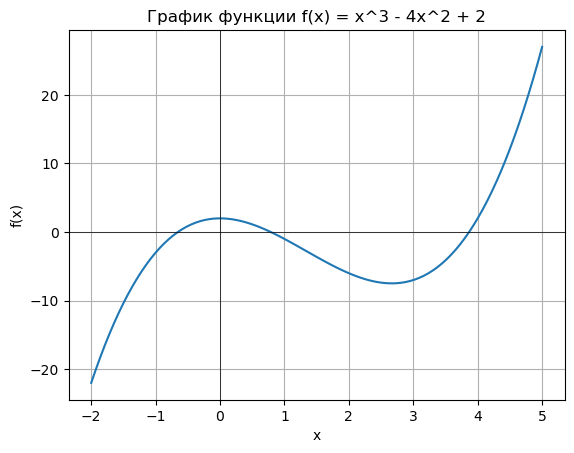

In [10]:
import matplotlib.pyplot as plt
import numpy as np

def f(x):
    return x**3 - 4 * x**2 + 2

x = np.linspace(-2, 5, 100)
y = f(x)

plt.plot(x, y)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('График функции f(x) = x^3 - 4x^2 + 2')
plt.grid(True)
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)
plt.show()

In [13]:
def f(x):
    return x**3 - 4 * x**2 + 2

def df(x):
    return 3*x**2 - 6*x

def newton_method(x0, epsilon=1e-4, max_iterations=1000):
    for i in range(max_iterations):
        x1 = x0 - f(x0) / df(x0)

        print(f'Итерация {i+1}: x = {x1}, f(x) = {f(x1)}')

        if abs(x1 - x0) < epsilon:
            print(f"Успешно достигнута точность {epsilon} за {i+1} итераций.")
            return x1

        x0 = x1

    raise ValueError(f"Не удалось достичь точности {epsilon} за {max_iterations} итераций.")

# Запросим начальное значение от пользователя
x0 = float(input("Введите начальное значение x0: "))

# Вызовем метод Ньютона
result = newton_method(x0)

print(f"Приближенный корень: {result}")


Итерация 1: x = -0.6666666666666667, f(x) = -0.0740740740740744
Итерация 2: x = -0.6527777777777778, f(x) = 0.01736379029492463
Итерация 3: x = -0.6561201671761993, f(x) = -0.004430276307056058
Итерация 4: x = -0.6552727867026839, f(x) = 0.0011076818412103506
Итерация 5: x = -0.6554849950703538, f(x) = -0.00027837740151248624
Итерация 6: x = -0.655431685385445, f(x) = 6.987044104822537e-05
Успешно достигнута точность 0.0001 за 6 итераций.
Приближенный корень: -0.655431685385445


In [1]:


def fac(n):
    if n == 1:
        return 1
    return fac(n - 1) * n


print(fac(28))
print(fac(28) * 24 * 24)



304888344611713860501504000000
175615686496347183648866304000000
